In [1]:
import scanpy as sc
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import warnings 
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", RuntimeWarning)

In [3]:
adata = sc.read_10x_h5("/home/ybeaumatin/Documents/Dataset init/Raw data/cellranger_output/per_sample_outs/Inf_J3/count/sample_filtered_feature_bc_matrix.h5").T
adata

AnnData object with n_obs × n_vars = 18087 × 11004
    obs: 'gene_ids', 'feature_types', 'genome'

In [6]:
adata.obs

,gene_ids,feature_types,genome
SAMD11,ENSG00000187634,Gene Expression,refdata-gex-GRCh38-2020-A_customprobe1
NOC2L,ENSG00000188976,Gene Expression,refdata-gex-GRCh38-2020-A_customprobe1
KLHL17,ENSG00000187961,Gene Expression,refdata-gex-GRCh38-2020-A_customprobe1
PLEKHN1,ENSG00000187583,Gene Expression,refdata-gex-GRCh38-2020-A_customprobe1
PERM1,ENSG00000187642,Gene Expression,refdata-gex-GRCh38-2020-A_customprobe1
...,...,...,...
EGFP,EGFP,Gene Expression,refdata-gex-GRCh38-2020-A_customprobe1
REPLI,REPLI,Gene Expression,refdata-gex-GRCh38-2020-A_customprobe1
GLYCO,GLYCO,Gene Expression,refdata-gex-GRCh38-2020-A_customprobe1
MEMB,MEMB,Gene Expression,refdata-gex-GRCh38-2020-A_customprobe1


In [7]:
adata.var

""
AAACAAGCAAGAACAAAGTAGGCT-1
AAACAAGCACAATGGCAGTAGGCT-1
AAACAAGCACACTAAGAGTAGGCT-1
AAACAAGCACCGTTTGAGTAGGCT-1
AAACAAGCACTTCGATAGTAGGCT-1
...
TTTGTGAGTCCTTATTAGTAGGCT-1
TTTGTGAGTCGAAGTAAGTAGGCT-1
TTTGTGAGTGCTGATTAGTAGGCT-1
TTTGTGAGTGTCCAATAGTAGGCT-1


In [8]:
adata.X.shape

(18087, 11004)

In [11]:
path_files_h5 = '/home/ybeaumatin/Documents/Folder data processing/Data/Transcriptomic/Transcriptomic 1/h5_files'

In [17]:
adatas = [x for x in os.listdir(path_files_h5 ) 
          if x.endswith('.h5')]

In [19]:
adatas

['sample_filtered_feature_bc_matrix_Mock_J3_.h5',
 'sample_filtered_feature_bc_matrix_Mock_J6_.h5',
 'sample_filtered_feature_bc_matrix_Inf_J3_.h5',
 'sample_filtered_feature_bc_matrix_Inf_J6_.h5']

In [22]:
def load_it(adata):
    samp= adata.split('_')[5]
    dpi = adata.split('_')[6]
    adata = sc.read_10x_h5(path_files_h5 + '/' + adata)
    adata.obs['Sample'] = samp
    adata.obs['dpi'] = dpi
    adata.obs['Id'] = adata.obs['Sample'] + '_' + adata.obs['dpi']
    adata.obs.index = adata.obs.index + '-' + samp + '_' + dpi
    return adata

In [24]:
adatas = [load_it(ad) for ad in adatas]

In [25]:
adatas

[AnnData object with n_obs × n_vars = 10542 × 18087
     obs: 'Sample', 'dpi', 'Id'
     var: 'gene_ids', 'feature_types', 'genome',
 AnnData object with n_obs × n_vars = 8525 × 18087
     obs: 'Sample', 'dpi', 'Id'
     var: 'gene_ids', 'feature_types', 'genome',
 AnnData object with n_obs × n_vars = 11004 × 18087
     obs: 'Sample', 'dpi', 'Id'
     var: 'gene_ids', 'feature_types', 'genome',
 AnnData object with n_obs × n_vars = 9137 × 18087
     obs: 'Sample', 'dpi', 'Id'
     var: 'gene_ids', 'feature_types', 'genome']

In [28]:
adatas[1].obs['Id']

AAACAAGCAAATCACGAACGGGAA-1-Mock_J6    Mock_J6
AAACAAGCACACTAAGAACGGGAA-1-Mock_J6    Mock_J6
AAACAAGCACGGATACAACGGGAA-1-Mock_J6    Mock_J6
AAACCAATCAAGCGATAACGGGAA-1-Mock_J6    Mock_J6
AAACCAATCACCTAATAACGGGAA-1-Mock_J6    Mock_J6
                                       ...   
TTTGGACGTGTGATGAAACGGGAA-1-Mock_J6    Mock_J6
TTTGGCGGTAACTACCAACGGGAA-1-Mock_J6    Mock_J6
TTTGTGAGTATTGTCAAACGGGAA-1-Mock_J6    Mock_J6
TTTGTGAGTGAGAAGGAACGGGAA-1-Mock_J6    Mock_J6
TTTGTGAGTGCGTACCAACGGGAA-1-Mock_J6    Mock_J6
Name: Id, Length: 8525, dtype: object

In [30]:
def qc(adata):
    sc.pp.filter_cells(adata, min_genes = 200)
    adata.var["mt"] = adata.var_names.str.startswith("MT-")
    adata.var["ribo"] = adata.var_names.str.startswith("RPS", "RPL")
    adata.var["hb"] = adata.var_names.str.startswith("^HB[^(P)]")
    sc.pp.calculate_qc_metrics(adata,qc_vars=["mt","ribo","hb"], inplace = True, percent_top = [20], log1p=True)

    remove = ['total_counts_mt', 'log1p_total_counts_mt', 'total_counts_ribo',
              'log1p_total_counts_ribo','total_counts_hb','log1p_total_counts_hb']

    adata.obs = adata.obs[[x for x in adata.obs.columns if x not in remove]]
    return adata

In [33]:
adatas = [qc(ad) for ad in adatas]

In [37]:
df = pd.concat([x.obs for x in adatas])

In [39]:
df = df.sort_values('Id')

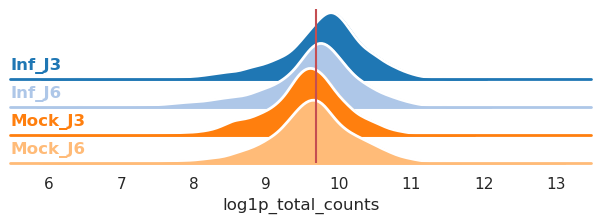

In [43]:
value = "log1p_total_counts"

sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

g = sns.FacetGrid(df, row="Id", hue="Id", aspect=15, height=0.5, palette="tab20")

g.map(sns.kdeplot, value, clip_on=False, fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, value, clip_on=False, color="w", lw=2)

g.map(plt.axhline, y=0, lw=2, clip_on=False)

def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)

g.map(label, value)

g.figure.subplots_adjust(hspace=-.6)

g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

for ax in g.axes.flat:
    ax.axvline(x=df[value].median(), color='r', linestyle='-')


plt.show()

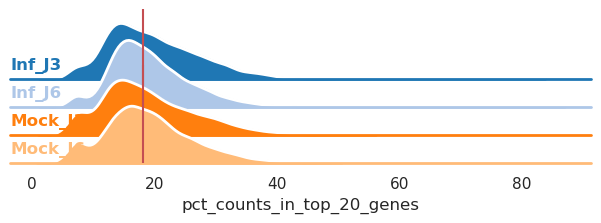

In [45]:
value = 'pct_counts_in_top_20_genes'


sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

g = sns.FacetGrid(df, row="Id", hue="Id", aspect=15, height=0.5, palette="tab20")

g.map(sns.kdeplot, value, clip_on=False, fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, value, clip_on=False, color="w", lw=2)

g.map(plt.axhline, y=0, lw=2, clip_on=False)

def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)

g.map(label, value)

g.figure.subplots_adjust(hspace=-.6)

g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

for ax in g.axes.flat:
    ax.axvline(x=df[value].median(), color='r', linestyle='-')


plt.show()

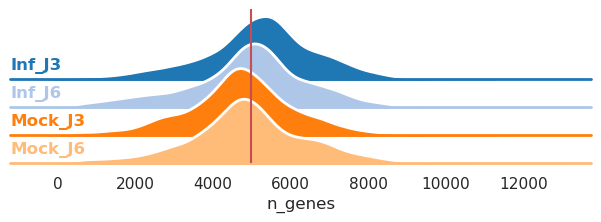

In [47]:
value = "n_genes"



sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

g = sns.FacetGrid(df, row="Id", hue="Id", aspect=15, height=0.5, palette="tab20")

g.map(sns.kdeplot, value, clip_on=False, fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, value, clip_on=False, color="w", lw=2)

g.map(plt.axhline, y=0, lw=2, clip_on=False)

def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)

g.map(label, value)

g.figure.subplots_adjust(hspace=-.6)

g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

for ax in g.axes.flat:
    ax.axvline(x=df[value].median(), color='r', linestyle='-')


plt.show()

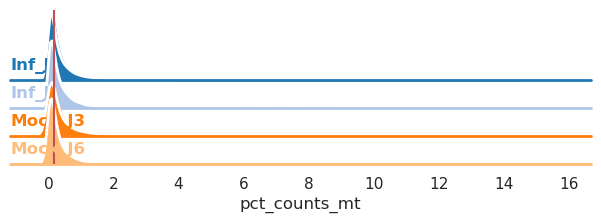

In [49]:
value = "pct_counts_mt"




sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

g = sns.FacetGrid(df, row="Id", hue="Id", aspect=15, height=0.5, palette="tab20")

g.map(sns.kdeplot, value, clip_on=False, fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, value, clip_on=False, color="w", lw=2)

g.map(plt.axhline, y=0, lw=2, clip_on=False)

def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)

g.map(label, value)

g.figure.subplots_adjust(hspace=-.6)

g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

for ax in g.axes.flat:
    ax.axvline(x=df[value].median(), color='r', linestyle='-')


plt.show()

In [53]:
import doubletdetection
from scipy.stats import median_abs_deviation as mad
import numpy as np

In [62]:
a = df[df.Id == 'Mock_J3'].log1p_total_counts
a

GCTCAATGTATGGTAGACTTTAGG-1-Mock_J3     9.226509
GCTCAATGTCACAGGGACTTTAGG-1-Mock_J3     9.285448
GCTCAATGTCAGGGCAACTTTAGG-1-Mock_J3     9.702106
GCTCAATGTCATTTAGACTTTAGG-1-Mock_J3     9.601707
GCTCAATGTGGTTATCACTTTAGG-1-Mock_J3     9.710206
                                        ...    
TGTCCAGGTTCTGGCAACTTTAGG-1-Mock_J3     9.671744
TGTCCAGGTTGTGAGAACTTTAGG-1-Mock_J3     9.318657
TGTCCTTTCAACCAAAACTTTAGG-1-Mock_J3    10.208911
TGTCATCCAGTTAAACACTTTAGG-1-Mock_J3    10.663101
TGTCCTTTCATCGATTACTTTAGG-1-Mock_J3     9.753594
Name: log1p_total_counts, Length: 10542, dtype: float32

In [58]:
np.median(a)

9.575261

In [254]:
np.median(a) - 5 * mad(a)

7.89164924621582

In [256]:
np.median(a) + 5 * mad(a)

11.258872985839844

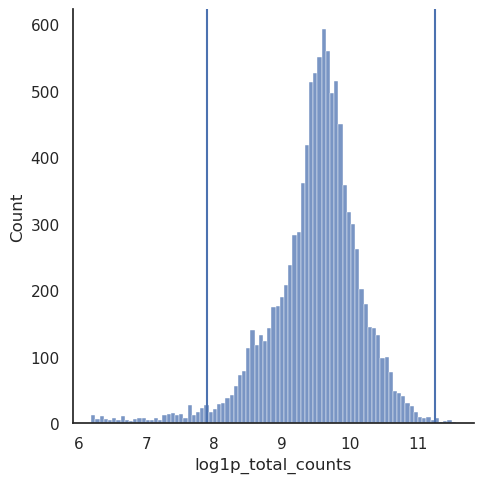

In [258]:
ax = sns.displot(a)

plt.axvline(np.median(a) - 5 * mad(a))
plt.axvline(np.median(a) + 5 * mad(a))

plt.show()

In [73]:
def mad_outlier(adata, metric, nmads, upper_only = False):
    M = adata.obs[metric]
    
    if not upper_only:
        return (M < np.median(M) - nmads * mad(M)) | (M > np.median(M) + nmads * mad(M))
    
    return (M > np.median(M) + nmads * mad(M))

In [75]:
clf = doubletdetection.BoostClassifier(
    n_iters=10,
    clustering_algorithm="louvain",
    standard_scaling=True,
    pseudocount=0.1,
    n_jobs=-1)

In [77]:
def pp(adata):
    adata = adata[adata.obs.pct_counts_mt < 25] #you can lower this based on the overal distribution of your dataset
    
    bool_vector = mad_outlier(adata, 'log1p_total_counts', 5) +\
            mad_outlier(adata, 'log1p_n_genes_by_counts', 5) +\
            mad_outlier(adata, 'pct_counts_in_top_20_genes', 5) +\
            mad_outlier(adata, 'pct_counts_mt', 3, upper_only = True)
    adata = adata[~bool_vector]

    adata.uns['cells_removed'] = sum(bool_vector)

    doublets = clf.fit(adata.X).predict(p_thresh=1e-16, voter_thresh=0.5)
    doublet_score = clf.doublet_score()

    adata.obs["doublet"] = doublets
    adata.obs["doublet_score"] = doublet_score

    adata.uns['doublets_removed'] = adata.obs.doublet.sum()
    adata = adata[adata.obs.doublet == 0]

    return adata

In [79]:
adatas = [pp(ad) for ad in adatas]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

In [81]:
for adata in adatas:
    print(len(adata), adata.uns['cells_removed'], adata.uns['doublets_removed'])

6950 2467 1125.0
5929 1717 879.0
7638 2292 1067.0
6382 1841 905.0


In [83]:
df2 = pd.concat([x.obs for x in adatas])
df2 = df2.sort_values('Id')

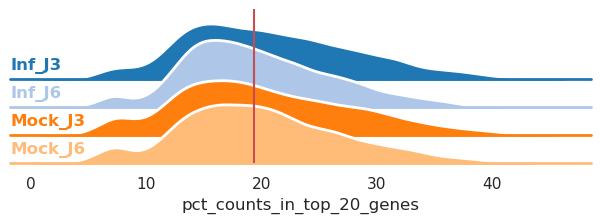

In [87]:
#value = "pct_counts_mt"
#value = "n_genes"
value = 'pct_counts_in_top_20_genes'
#value = "log1p_total_counts"

sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

g = sns.FacetGrid(df2, row="Id", hue="Id", aspect=15, height=0.5, palette="tab20")

g.map(sns.kdeplot, value, clip_on=False, fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, value, clip_on=False, color="w", lw=2)

g.map(plt.axhline, y=0, lw=2, clip_on=False)

def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)

g.map(label, value)

g.figure.subplots_adjust(hspace=-.6)

g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

for ax in g.axes.flat:
    ax.axvline(x=df2[value].median(), color='r', linestyle='-')


plt.show()

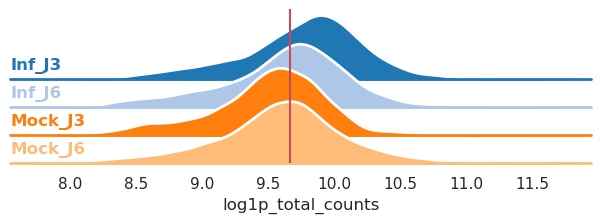

In [89]:
#value = "pct_counts_mt"
#value = "n_genes"
#value = 'pct_counts_in_top_20_genes'
value = "log1p_total_counts"

sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

g = sns.FacetGrid(df2, row="Id", hue="Id", aspect=15, height=0.5, palette="tab20")

g.map(sns.kdeplot, value, clip_on=False, fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, value, clip_on=False, color="w", lw=2)

g.map(plt.axhline, y=0, lw=2, clip_on=False)

def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)

g.map(label, value)

g.figure.subplots_adjust(hspace=-.6)

g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

for ax in g.axes.flat:
    ax.axvline(x=df2[value].median(), color='r', linestyle='-')


plt.show()

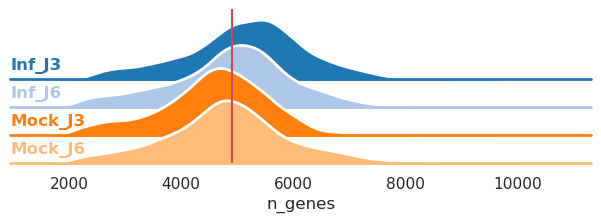

In [91]:
#value = "pct_counts_mt"
value = "n_genes"
#value = 'pct_counts_in_top_20_genes'
#value = "log1p_total_counts"

sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

g = sns.FacetGrid(df2, row="Id", hue="Id", aspect=15, height=0.5, palette="tab20")

g.map(sns.kdeplot, value, clip_on=False, fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, value, clip_on=False, color="w", lw=2)

g.map(plt.axhline, y=0, lw=2, clip_on=False)

def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)

g.map(label, value)

g.figure.subplots_adjust(hspace=-.6)

g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

for ax in g.axes.flat:
    ax.axvline(x=df2[value].median(), color='r', linestyle='-')


plt.show()

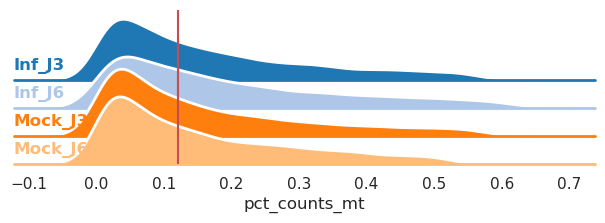

In [93]:
value = "pct_counts_mt"
#value = "n_genes"
#value = 'pct_counts_in_top_20_genes'
#value = "log1p_total_counts"

sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

g = sns.FacetGrid(df2, row="Id", hue="Id", aspect=15, height=0.5, palette="tab20")

g.map(sns.kdeplot, value, clip_on=False, fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, value, clip_on=False, color="w", lw=2)

g.map(plt.axhline, y=0, lw=2, clip_on=False)

def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)

g.map(label, value)

g.figure.subplots_adjust(hspace=-.6)

g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

for ax in g.axes.flat:
    ax.axvline(x=df2[value].median(), color='r', linestyle='-')


plt.show()

In [103]:
df2

,Sample,dpi,Id,n_genes,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,pct_counts_mt,pct_counts_ribo,pct_counts_hb,doublet,doublet_score
ACCACGTTCCGAAAGTAGTAGGCT-1-Inf_J3,Inf,J3,Inf_J3,3814,3814,8.246696,10856.0,9.292565,27.008106,0.073692,0.0,0.0,0.0,2.856259e-17
GCTGTAACATTGCCTGAGTAGGCT-1-Inf_J3,Inf,J3,Inf_J3,6071,6071,8.711443,22149.0,10.005592,13.151835,0.334101,0.0,0.0,0.0,3.299158e+01
GCTGTAACATTCTGTAAGTAGGCT-1-Inf_J3,Inf,J3,Inf_J3,6051,6051,8.708144,21871.0,9.992963,15.829180,0.196607,0.0,0.0,0.0,3.190149e-08
GCTGTAACAGTAATACAGTAGGCT-1-Inf_J3,Inf,J3,Inf_J3,4813,4813,8.479284,12423.0,9.427385,7.888594,0.491025,0.0,0.0,0.0,1.959981e-12
GCTGTAACAGGCTGTGAGTAGGCT-1-Inf_J3,Inf,J3,Inf_J3,5207,5207,8.557951,21580.0,9.979568,30.588508,0.120482,0.0,0.0,0.0,1.174637e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CCCGTAAGTCATTTAGAACGGGAA-1-Mock_J6,Mock,J6,Mock_J6,5486,5486,8.610137,16383.0,9.704061,15.601538,0.036623,0.0,0.0,0.0,1.523242e-10
CCCGTAAGTATATTCGAACGGGAA-1-Mock_J6,Mock,J6,Mock_J6,5178,5178,8.552367,18420.0,9.821246,26.943540,0.179153,0.0,0.0,0.0,8.171932e-02
CCCGCAATCTCAAACTAACGGGAA-1-Mock_J6,Mock,J6,Mock_J6,6032,6032,8.705000,22286.0,10.011759,13.932514,0.363457,0.0,0.0,0.0,1.013625e-04
CCCTAAGGTCAATTGCAACGGGAA-1-Mock_J6,Mock,J6,Mock_J6,4800,4800,8.476580,16469.0,9.709296,29.783229,0.012144,0.0,0.0,0.0,1.445901e-06


In [121]:
os.makedirs("processed_data", exist_ok=True)

In [165]:
for ad in adatas:
    unique_id = ad.obs['Id'][0]
    file_path = os.path.join("processed_data", f"adata_{unique_id}.h5ad")
    ad.write(file_path)
    print(f"Saved: {file_path}")

Saved: processed_data/adata_Mock_J3.h5ad
Saved: processed_data/adata_Mock_J6.h5ad
Saved: processed_data/adata_Inf_J3.h5ad
Saved: processed_data/adata_Inf_J6.h5ad


In [170]:
adatas2 = [sc.read_h5ad("processed_data/" + x) for x in os.listdir('processed_data')] #see if loading

In [172]:
adatas2

[AnnData object with n_obs × n_vars = 6382 × 18087
     obs: 'Sample', 'dpi', 'Id', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'doublet', 'doublet_score'
     var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
     uns: 'cells_removed', 'doublets_removed',
 AnnData object with n_obs × n_vars = 5929 × 18087
     obs: 'Sample', 'dpi', 'Id', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'doublet', 'doublet_score'
     var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_cou

In [150]:
adatas2[3].obs

,Sample,dpi,Id,n_genes,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,pct_counts_mt,pct_counts_ribo,pct_counts_hb,doublet,doublet_score
AAACAAGCAACCCTATACTTTAGG-1-Mock_J3,Mock,J3,Mock_J3,4931,4931,8.503500,14086.0,9.553008,13.502769,0.049695,0.0,0.0,0.0,1.132561e-07
AAACAAGCAACGACTAACTTTAGG-1-Mock_J3,Mock,J3,Mock_J3,5986,5986,8.697346,30245.0,10.317120,26.768061,0.244669,0.0,0.0,0.0,3.694116e-12
AAACAAGCACAATACGACTTTAGG-1-Mock_J3,Mock,J3,Mock_J3,3652,3652,8.203304,8254.0,9.018575,12.260722,0.302883,0.0,0.0,0.0,3.057015e-08
AAACAAGCACTTCGATACTTTAGG-1-Mock_J3,Mock,J3,Mock_J3,3016,3016,8.012018,6558.0,8.788593,17.444343,0.106740,0.0,0.0,0.0,2.972136e-18
AAACAAGCAGTTATCCACTTTAGG-1-Mock_J3,Mock,J3,Mock_J3,3726,3726,8.223359,8735.0,9.075208,14.550658,0.171723,0.0,0.0,0.0,1.411567e-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTGAGTGAGAAGGACTTTAGG-1-Mock_J3,Mock,J3,Mock_J3,4990,4990,8.515392,17165.0,9.750686,17.500728,0.023303,0.0,0.0,0.0,9.430173e-12
TTTGTGAGTGCTCCTTACTTTAGG-1-Mock_J3,Mock,J3,Mock_J3,3528,3528,8.168770,8347.0,9.029778,19.575896,0.551096,0.0,0.0,0.0,1.260184e-16
TTTGTGAGTGCTTCTCACTTTAGG-1-Mock_J3,Mock,J3,Mock_J3,5019,5019,8.521185,19508.0,9.878632,31.674185,0.082018,0.0,0.0,0.0,2.356814e-06
TTTGTGAGTTGGTTACACTTTAGG-1-Mock_J3,Mock,J3,Mock_J3,5841,5841,8.672828,22521.0,10.022248,16.118290,0.182052,0.0,0.0,0.0,9.081502e-12
